In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
import prepare

In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
taxis.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


In [4]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [5]:
taxis['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [6]:
taxis['color'].value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [7]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


# 1. Drop Redundant, & Useless Columns
# 2. Fix NULL values
# 3. Create Dummy Variables of Object/String & Categorical variables --> Binary Variables

In [8]:
taxis = taxis.drop(columns=['pickup_zone','dropoff_zone','pickup','dropoff'])

In [9]:
taxis.isnull().sum()

passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_borough     26
dropoff_borough    45
dtype: int64

In [10]:
taxis = taxis.dropna()

In [11]:
taxis.isnull().sum()

passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [12]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6341 non-null   int64  
 1   distance         6341 non-null   float64
 2   fare             6341 non-null   float64
 3   tip              6341 non-null   float64
 4   tolls            6341 non-null   float64
 5   total            6341 non-null   float64
 6   color            6341 non-null   object 
 7   payment          6341 non-null   object 
 8   pickup_borough   6341 non-null   object 
 9   dropoff_borough  6341 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 544.9+ KB


In [13]:
taxis_dummies = pd.get_dummies(taxis[['color','payment','pickup_borough','dropoff_borough']],drop_first=True)

In [14]:
taxis_dummies.head(2)

,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0


In [ ]:
#concat

In [18]:
taxis = pd.concat( [taxis, taxis_dummies], axis=1 )

In [19]:
num_vars = ['passengers', 'distance','fare','tip','total']

In [20]:
taxi_train,taxi_validate,taxi_test = prepare.split_dataset(taxis)

In [21]:
taxi_train.head(2)

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
1336,2,1.43,8.0,0.00,0.0,11.80,yellow,cash,Manhattan,Manhattan,1,0,0,1,0,0,1,0,0
5255,1,0.88,6.5,1.96,0.0,11.76,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0


In [ ]:
#target variable
#
# y-axis

In [ ]:
#split stratify on target = 'fare'

In [29]:
taxi_train.columns.to_list()

['passengers',
 'distance',
 'fare',
 'tip',
 'tolls',
 'total',
 'color',
 'payment',
 'pickup_borough',
 'dropoff_borough',
 'color_yellow',
 'payment_credit card',
 'pickup_borough_Brooklyn',
 'pickup_borough_Manhattan',
 'pickup_borough_Queens',
 'dropoff_borough_Brooklyn',
 'dropoff_borough_Manhattan',
 'dropoff_borough_Queens',
 'dropoff_borough_Staten Island']

<AxesSubplot:title={'center':'distance vs fare?'}, xlabel='distance', ylabel='fare'>

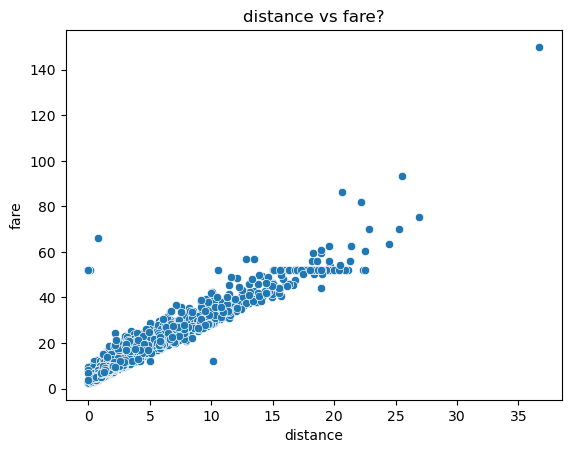

In [23]:
plt.title('distance vs fare?')
sns.scatterplot(x='distance',y='fare',data=taxi_train)

<AxesSubplot:xlabel='passengers', ylabel='fare'>

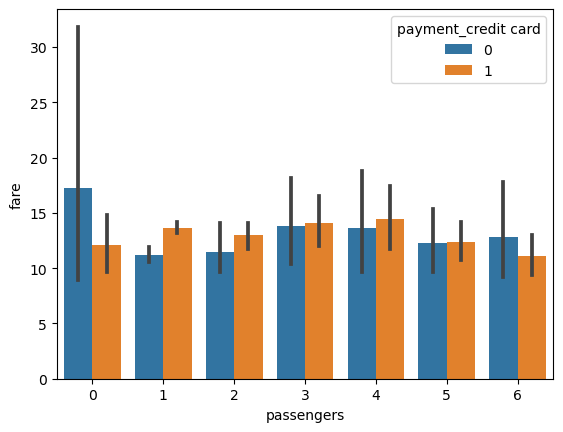

In [33]:
sns.barplot(x='passengers',y='fare',hue='payment_credit card',data=taxi_train)